In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Apply with Multiple Arguments

In [2]:
height = Table.read_table('galton.csv').select(1, 2, 7).relabeled(2, 'child')
height

father | mother | child
78.5   | 67     | 73.2
78.5   | 67     | 69.2
78.5   | 67     | 69
78.5   | 67     | 69
75.5   | 66.5   | 73.5
75.5   | 66.5   | 72.5
75.5   | 66.5   | 65.5
75.5   | 66.5   | 65.5
75     | 64     | 71
75     | 64     | 68
... (924 rows omitted)

In [ ]:
height

In [3]:
parent_max = height.apply(max, 'mother', 'father')
parent_max

array([78.5, 78.5, 78.5, 78.5, 75.5, 75.5, 75.5, 75.5, 75. , 75. , 75. ,
       75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74.5, 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73.2, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72.5, 72.5, 72.5, 72. ,
       72.5, 72.5, 72.5, 72.5, 72.5, 72.5, 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71

In [4]:
def avg(x, y):
    """Compute the average of two values"""
    return (x+y)/2

In [6]:
avg(10,2)

6.0

In [5]:
parent_avg = height.apply(avg, 'mother', 'father')
parent_avg

array([72.75, 72.75, 72.75, 72.75, 71.  , 71.  , 71.  , 71.  , 69.5 ,
       69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 66.75, 66.75, 66.75,
       66.75, 66.75, 66.75, 71.  , 71.  , 71.  , 71.  , 71.  , 71.  ,
       71.  , 70.25, 70.25, 70.25, 70.25, 69.75, 68.  , 68.  , 68.  ,
       68.  , 68.  , 68.  , 68.  , 68.  , 67.5 , 70.  , 70.  , 70.  ,
       70.  , 69.75, 69.75, 69.75, 69.  , 69.  , 69.  , 69.  , 69.  ,
       69.  , 69.  , 69.  , 69.  , 68.75, 68.75, 68.75, 68.75, 68.75,
       68.75, 68.5 , 68.5 , 68.5 , 68.1 , 70.85, 70.85, 70.85, 70.85,
       70.85, 70.85, 70.85, 70.85, 70.  , 70.  , 70.  , 69.5 , 69.5 ,
       69.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.75,
       68.  , 68.  , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 ,
       67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 68.  , 68.  ,
       68.  , 67.  , 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.  ,
       67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  ,
       66.5 , 70.  ,

## Prediction

In [7]:
height

father | mother | child
78.5   | 67     | 73.2
78.5   | 67     | 69.2
78.5   | 67     | 69
78.5   | 67     | 69
75.5   | 66.5   | 73.5
75.5   | 66.5   | 72.5
75.5   | 66.5   | 65.5
75.5   | 66.5   | 65.5
75     | 64     | 71
75     | 64     | 68
... (924 rows omitted)

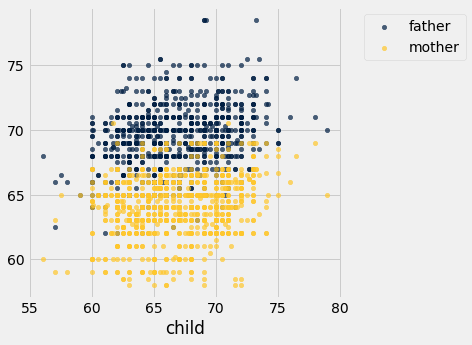

In [8]:
height.scatter('child')

Add a column with parents' average height to the height table

In [9]:
height = height.with_column(
    'parent average', parent_avg
)
height

father | mother | child | parent average
78.5   | 67     | 73.2  | 72.75
78.5   | 67     | 69.2  | 72.75
78.5   | 67     | 69    | 72.75
78.5   | 67     | 69    | 72.75
75.5   | 66.5   | 73.5  | 71
75.5   | 66.5   | 72.5  | 71
75.5   | 66.5   | 65.5  | 71
75.5   | 66.5   | 65.5  | 71
75     | 64     | 71    | 69.5
75     | 64     | 68    | 69.5
... (924 rows omitted)

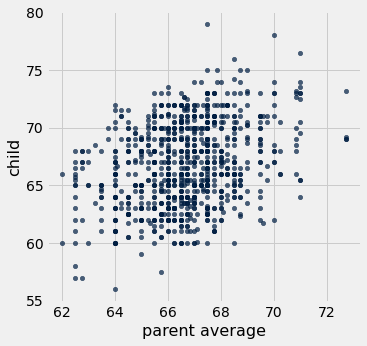

In [10]:
height.scatter('parent average', 'child')

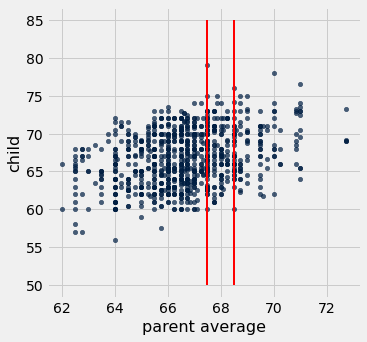

In [11]:
height.scatter('parent average', 'child')

# this code draws two red lines on the plot to show 
# children whose parents' average heights are around 68
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [12]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

father | mother | child | parent average
74     | 62     | 74    | 68
74     | 62     | 70    | 68
74     | 62     | 68    | 68
74     | 62     | 67    | 68
74     | 62     | 67    | 68
74     | 62     | 66    | 68
74     | 62     | 63.5  | 68
74     | 62     | 63    | 68
74     | 61     | 65    | 67.5
73.2   | 63     | 62.7  | 68.1
... (175 rows omitted)

In [13]:
close_to_68.column('child').mean()

67.62

In [14]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()                       

In [15]:
predict_child(68)

67.62

In [16]:
predict_child(65)

65.83829787234043

In [17]:
# Apply predict_child to all the parent averages

height_pred = height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
)

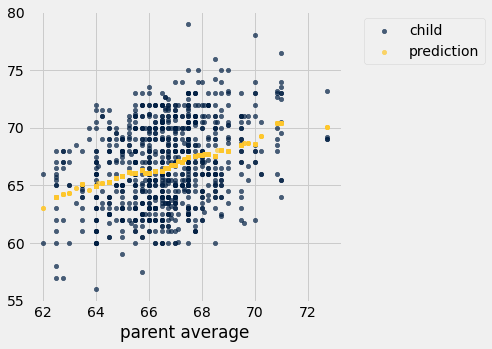

In [18]:
height_pred.select('child', 'parent average', 'prediction').scatter('parent average')

## Group

In [19]:
all_cones = Table.read_table('cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor     | Price
strawberry | 3.55
chocolate  | 4.75
chocolate  | 5.25
strawberry | 5.25
chocolate  | 5.25

In [20]:
cones.group('Flavor')

Flavor     | count
chocolate  | 3
strawberry | 2

In [28]:
cones.group('Flavor', sum)

Flavor     | Price sum
chocolate  | 15.25
strawberry | 8.8

In [25]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 5.25, 5.25])

In [26]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

In [27]:
sum(cones.where('Flavor', are.equal_to('strawberry')).column('Price'))

8.8

In [ ]:
cones.group('Flavor', max)

In [29]:
cones.group('Flavor', list)

C:\Users\dw36\Anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Flavor     | Price list
chocolate  | [4.75, 5.25, 5.25]
strawberry | [3.55, 5.25]

Which NBA team payed their players the most?

In [30]:
nba = Table.read_table('nba2019-20.csv').relabeled(3, 'salary')
nba

team                  | player            | position | salary
Orlando Magic         | Aaron Gordon      |  PF      | 19.8636
Indiana Pacers        | Aaron Holiday     |  PG      | 2.3292
Houston Rockets       | Aaron Jackson     |  F       | 1.37824
Oklahoma City Thunder | Abdel Nader       |  SF      | 1.61852
Washington Wizards    | Admiral Schofield |  SG      | 1
Philadelphia 76ers    | Al Horford        |  PF      | 28
Philadelphia 76ers    | Alec Burks        |  SG      | 1.62056
Golden State Warriors | Alen Smailagic    |  PF      | 0.89831
Oklahoma City Thunder | Alex Abrines      |  G       | 5.45524
Los Angeles Lakers    | Alex Caruso       |  SG      | 2.75
... (518 rows omitted)

In [ ]:
nba.sort('team')

Keep only team and salary columns for analysis

In [31]:
teams_and_money = nba.select('team', 'salary')
teams_and_money

team                  | salary
Orlando Magic         | 19.8636
Indiana Pacers        | 2.3292
Houston Rockets       | 1.37824
Oklahoma City Thunder | 1.61852
Washington Wizards    | 1
Philadelphia 76ers    | 28
Philadelphia 76ers    | 1.62056
Golden State Warriors | 0.89831
Oklahoma City Thunder | 5.45524
Los Angeles Lakers    | 2.75
... (518 rows omitted)

In [32]:
teams_and_money.group('team', sum)

team                  | salary sum
Atlanta Hawks         | 80.5738
Boston Celtics        | 119.017
Brooklyn Nets         | 132.518
Charlotte Hornets     | 97.4289
Chicago Bulls         | 133.128
Cleveland Cavaliers   | 95.064
Dallas Mavericks      | 134.875
Denver Nuggets        | 126.842
Detroit Pistons       | 135.927
Golden State Warriors | 106.011
... (20 rows omitted)

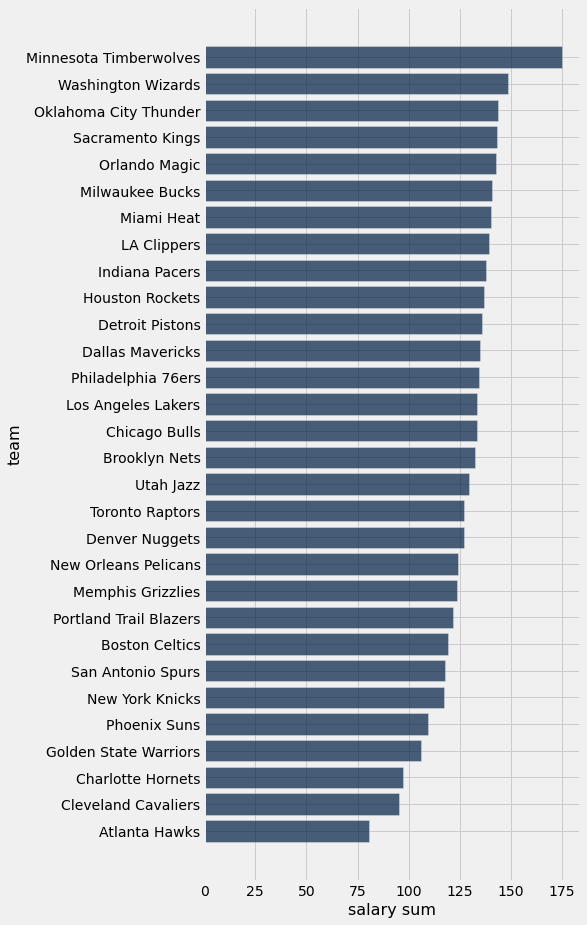

In [33]:
teams_and_money.group('team', sum).sort(1, descending=True).barh('team')

In [34]:
nba.group('position')

position | count
 C       | 83
 F       | 20
 G       | 38
 PF      | 89
 PG      | 82
 SF      | 94
 SG      | 122

In [35]:
positions_and_money = nba.select('position', 'salary')
positions_and_money.group('position', np.mean)

position | salary mean
 C       | 8.51344
 F       | 4.37665
 G       | 2.84069
 PF      | 7.13819
 PG      | 9.44018
 SF      | 7.71028
 SG      | 6.64896

In [ ]:
nba.group('position', np.mean)

## Group by multiple columns

In [36]:
all_cones

Flavor     | Color       | Price
strawberry | pink        | 3.55
chocolate  | light brown | 4.75
chocolate  | dark brown  | 5.25
strawberry | pink        | 5.25
chocolate  | dark brown  | 5.25
bubblegum  | pink        | 4.75

In [37]:
all_cones.group('Flavor')

Flavor     | count
bubblegum  | 1
chocolate  | 3
strawberry | 2

In [38]:
all_cones.groups(['Flavor', 'Color'])

Flavor     | Color       | count
bubblegum  | pink        | 1
chocolate  | dark brown  | 2
chocolate  | light brown | 1
strawberry | pink        | 2

In [39]:
all_cones.groups(['Flavor', 'Color'], min)

Flavor     | Color       | Price min
bubblegum  | pink        | 4.75
chocolate  | dark brown  | 5.25
chocolate  | light brown | 4.75
strawberry | pink        | 3.55

## Challenge question

Which NBA teams spent the most on their starters in 2019-2020?
* Each team has one starter per position
* Assume the starter for a team & position is the player with the highest salary on that team in that position

In [43]:
nba

team                  | player            | position | salary
Orlando Magic         | Aaron Gordon      |  PF      | 19.8636
Indiana Pacers        | Aaron Holiday     |  PG      | 2.3292
Houston Rockets       | Aaron Jackson     |  F       | 1.37824
Oklahoma City Thunder | Abdel Nader       |  SF      | 1.61852
Washington Wizards    | Admiral Schofield |  SG      | 1
Philadelphia 76ers    | Al Horford        |  PF      | 28
Philadelphia 76ers    | Alec Burks        |  SG      | 1.62056
Golden State Warriors | Alen Smailagic    |  PF      | 0.89831
Oklahoma City Thunder | Alex Abrines      |  G       | 5.45524
Los Angeles Lakers    | Alex Caruso       |  SG      | 2.75
... (518 rows omitted)

In [44]:
starters = nba.drop('player').groups(['team', 'position'], max)
starters

team           | position | salary max
Atlanta Hawks  |  C       | 2.56475
Atlanta Hawks  |  G       | 1.62056
Atlanta Hawks  |  PF      | 2.68656
Atlanta Hawks  |  PG      | 6.273
Atlanta Hawks  |  SF      | 25.1025
Atlanta Hawks  |  SG      | 18.6066
Boston Celtics |  C       | 5
Boston Celtics |  F       | 1.41685
Boston Celtics |  PF      | 7.83
Boston Celtics |  PG      | 32.742
... (176 rows omitted)

In [45]:
starters.drop('position').group('team', sum).sort(1, descending=True)

team                   | salary max sum
Minnesota Timberwolves | 134.924
Oklahoma City Thunder  | 110.633
Miami Heat             | 109.546
Philadelphia 76ers     | 108.046
Houston Rockets        | 106.257
Washington Wizards     | 104.046
Milwaukee Bucks        | 101.793
LA Clippers            | 101.514
Detroit Pistons        | 97.5335
Portland Trail Blazers | 94.4105
... (20 rows omitted)

## Pivot tables

In [40]:
all_cones.pivot('Flavor', 'Color')

Color       | bubblegum | chocolate | strawberry
dark brown  | 0         | 2         | 0
light brown | 0         | 1         | 0
pink        | 1         | 0         | 2

In [42]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=min)

Color       | bubblegum | chocolate | strawberry
dark brown  | 0         | 5.25      | 0
light brown | 0         | 4.75      | 0
pink        | 4.75      | 0         | 3.55

In [41]:
all_cones.groups(['Flavor', 'Color'], min)

Flavor     | Color       | Price min
bubblegum  | pink        | 4.75
chocolate  | dark brown  | 5.25
chocolate  | light brown | 4.75
strawberry | pink        | 3.55